In [30]:
import numpy
!.\Scripts\activate
# !pip install tensorflow
!echo %VIRTUAL_ENV%
# !pip install torch
!pip install keras-core
# !pip install numpy
# !pip install matplotlib

C:\Users\Jasiek\Desktop\main\EDU\EDU sem7\rozpoznawanie_obraz�"��"'w\lab3-GAN


In [24]:
import pip
pip.main(['install', 'tensorflow'])
# pip.main(['install', 'torch'])
# pip.main(['install', 'keras-core'])
# pip.main(['install','numpy'])
# pip.main(['install','matplotlib'])

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


  Using cached tensorflow-2.14.0-cp39-cp39-win_amd64.whl (2.1 kB)
  Using cached tensorflow_intel-2.14.0-cp39-cp39-win_amd64.whl (284.1 MB)
  Using cached termcolor-2.3.0-py3-none-any.whl (6.9 kB)
  Using cached tensorflow_io_gcs_filesystem-0.31.0-cp39-cp39-win_amd64.whl (1.5 MB)
  Using cached numpy-1.26.1-cp39-cp39-win_amd64.whl (15.8 MB)
  Using cached protobuf-4.25.0-cp39-cp39-win_amd64.whl (413 kB)
  Using cached tensorboard-2.14.1-py3-none-any.whl (5.5 MB)
  Using cached keras-2.14.0-py3-none-any.whl (1.7 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached libclang-16.0.6-py2.py3-none-win_amd64.whl (24.4 MB)
  Using cached grpcio-1.59.2-cp39-cp39-win_amd64.whl (3.7 MB)
  Using cached gast-0.5.4-py3-none-any.whl (19 kB)
  Using cached ml_dtypes-0.2.0-cp39-cp39-win_amd64.whl (938 kB)
  Using cached flatbuffers-23.5.26-py2.py3-none-any.whl (26 kB)
  Using cached wrapt-1.14.1-cp39-cp39-win_amd64.whl (35 kB)
  Using cached absl_py-2.0.0-py3-none-any.whl (130 

ERROR: Could not install packages due to an OSError: [WinError 5] Odmowa dostępu: 'C:\\Users\\Jasiek\\Desktop\\main\\EDU\\EDU sem7\\rozpoznawanie_obrazów\\lab3-GAN\\Lib\\site-packages\\numpy\\core\\_multiarray_tests.cp39-win_amd64.pyd'
Check the permissions.

You should consider upgrading via the 'C:\Users\Jasiek\Desktop\main\EDU\EDU sem7\rozpoznawanie_obrazów\lab3-GAN\Scripts\python.exe -m pip install --upgrade pip' command.


1

In [2]:
import numpy as np
import os
from matplotlib import pyplot as plt
# plt.rcParams['image.cmap'] = 'gray'
os.environ["KERAS_BACKEND"] = "torch"
import keras_core as keras

Using PyTorch backend.


In [38]:
discriminator = keras.models.Sequential([
    keras.layers.Input((32, 32, 3)),
    keras.layers.Conv2D(32, (4, 4), strides = 2, padding='same',
                        kernel_regularizer=keras.regularizers.L2(0.01), bias_regularizer=keras.regularizers.L2(0.01)),
    keras.layers.LeakyReLU(negative_slope=0.2),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(64, (4, 4), strides = 2, padding='same',
                        kernel_regularizer=keras.regularizers.L2(0.01), bias_regularizer=keras.regularizers.L2(0.01)),
    keras.layers.LeakyReLU(negative_slope=0.2),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(64, (4, 4), strides = 2, padding='same',
                        kernel_regularizer=keras.regularizers.L2(0.01), bias_regularizer=keras.regularizers.L2(0.01)),
    keras.layers.LeakyReLU(negative_slope=0.2),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(1, activation='sigmoid')
])

discriminator.compile()
discriminator.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 16, 16, 32)        │      1,568 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ leaky_re_lu_15 (LeakyReLU)      │ (None, 16, 16, 32)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ batch_normalization_6           │ (None, 16, 16, 32)        │        128 │
│ (BatchNormalization)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_10 (Conv2D)              │ (None, 8, 8, 64)          │     32,832 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ leaky_re_lu_16 (LeakyReLU)      │ (None, 8, 8, 64)          │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ batch_normalization_7           │ (None, 8, 8, 64)          │        256 │
│ (BatchNormalization)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_11 (Conv2D)              │ (None, 4, 4, 64)          │     65,600 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ leaky_re_lu_17 (LeakyReLU)      │ (None, 4, 4, 64)          │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ batch_normalization_8           │ (None, 4, 4, 64)          │        256 │
│ (BatchNormalization)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 64)          │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ flatten_2 (Flatten)             │ (None, 1024)              │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_5 (Dense)                 │ (None, 1)                 │      1,025 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 101,665 (397.13 KB)

 Trainable params: 101,345 (395.88 KB)

 Non-trainable params: 320 (1.25 KB)

In [39]:
GEN_INPUT_SIZE = 64

@keras.saving.register_keras_serializable()
def toRGB(x):
    return (x+1)/2

generator = keras.models.Sequential([
    keras.layers.Input((GEN_INPUT_SIZE,)),
    keras.layers.Dense(1024),
    keras.layers.Reshape((4, 4, 64)),
    keras.layers.Conv2DTranspose(64, (4, 4), strides=2, padding="same",),
    keras.layers.LeakyReLU(negative_slope=0.2),
    keras.layers.Conv2DTranspose(128, (4, 4), strides=2, padding="same"),
    keras.layers.LeakyReLU(negative_slope=0.2),
    keras.layers.Conv2DTranspose(256, (4, 4), strides=2, padding="same"),
    keras.layers.LeakyReLU(negative_slope=0.2),
    keras.layers.Conv2D(3, (5, 5), padding="same", activation='tanh'),
    keras.layers.Lambda(toRGB),
])

generator.compile()
generator.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 1024)              │     66,560 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ reshape_3 (Reshape)             │ (None, 4, 4, 64)          │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_transpose_9              │ (None, 8, 8, 64)          │     65,600 │
│ (Conv2DTranspose)               │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ leaky_re_lu_18 (LeakyReLU)      │ (None, 8, 8, 64)          │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_transpose_10             │ (None, 16, 16, 128)       │    131,200 │
│ (Conv2DTranspose)               │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ leaky_re_lu_19 (LeakyReLU)      │ (None, 16, 16, 128)       │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_transpose_11             │ (None, 32, 32, 256)       │    524,544 │
│ (Conv2DTranspose)               │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ leaky_re_lu_20 (LeakyReLU)      │ (None, 32, 32, 256)       │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_12 (Conv2D)              │ (None, 32, 32, 3)         │     19,203 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ lambda_3 (Lambda)               │ (None, 32, 32, 3)         │          0 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 807,107 (3.08 MB)

 Trainable params: 807,107 (3.08 MB)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
0.5279082 0.47924164
(1, 32, 32, 3)


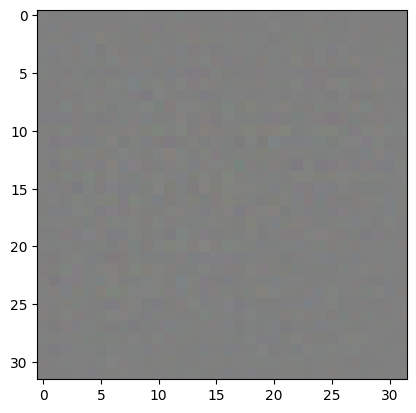

In [40]:
random_input = np.random.normal(0, 1, (1, GEN_INPUT_SIZE))
# print(random_input)
out = generator.predict(random_input)

print(np.max(out), np.min(out))
print(out.shape)
# print(out[0])
plt.imshow(out[0])
plt.show()


In [61]:
import multiprocessing.pool
import tensorflow
import os
real_dataset = keras.utils.image_dataset_from_directory(
    "C:\\Users\\Jasiek\\Desktop\\main\\EDU\\EDU sem7\\crawled_cakes",
    labels=None,
    label_mode=None,
    image_size=(32, 32),
    batch_size=None,
)



Found 1436 files belonging to 1 classes.


In [62]:
real_data = np.array(list(real_dataset))/255
# real_data.
# tensorflow.data.Dataset.as_numpy_iterator(
# )

(1436, 32, 32, 3)
[[[0.21470588 0.20196079 0.26764706]
  [0.39509803 0.5392157  0.6637255 ]
  [0.47254902 0.61764705 0.7323529 ]
  ...
  [0.33137256 0.48431373 0.5852941 ]
  [0.34313726 0.5        0.59705883]
  [0.2382353  0.4107843  0.5127451 ]]

 [[0.28039217 0.37254903 0.4882353 ]
  [0.38333333 0.5372549  0.6862745 ]
  [0.40098038 0.5754902  0.69215685]
  ...
  [0.1754902  0.28431374 0.3872549 ]
  [0.23529412 0.4127451  0.5107843 ]
  [0.23921569 0.43235293 0.5392157 ]]

 [[0.40392157 0.50686276 0.6509804 ]
  [0.47843137 0.6245098  0.7480392 ]
  [0.35686275 0.5205882  0.6647059 ]
  ...
  [0.8519608  0.9823529  0.9941176 ]
  [0.85784316 0.9647059  0.9852941 ]
  [0.60882354 0.28529412 0.40098038]]

 ...

 [[0.4970588  0.6460784  0.71568626]
  [0.6519608  0.78137255 0.8490196 ]
  [0.5029412  0.63235295 0.70686275]
  ...
  [0.17254902 0.0372549  0.14117648]
  [0.16666667 0.21764706 0.53039217]
  [0.07843138 0.16862746 0.46470588]]

 [[0.53333336 0.6882353  0.7519608 ]
  [0.6009804  0.754

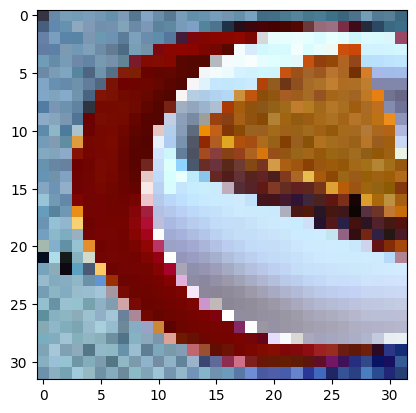

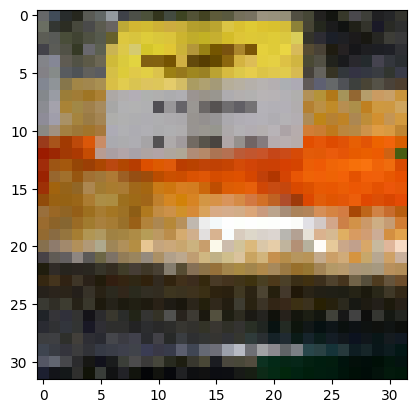

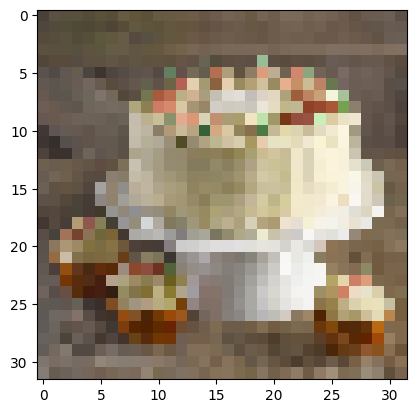

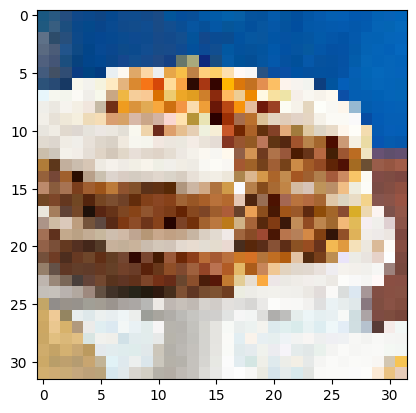

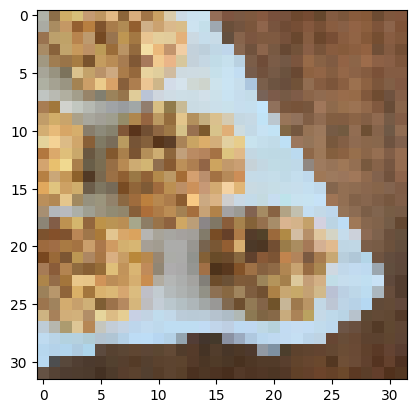

In [63]:
print(real_data.shape)
print(real_data[0])
for i in range(5):
    plt.imshow(real_data[i])
    plt.show()


Note that layers (such that BatchNorm) do the learning in forward phase, so you have to set them to eval() too

In [64]:
import torch
BATCH_SIZE = 32

y_real_data = np.ones(len(real_data))

real_dataset = torch.utils.data.TensorDataset(
    torch.from_numpy(real_data), torch.from_numpy(y_real_data)
)

real_dataloader = torch.utils.data.DataLoader(
    real_dataset, batch_size=BATCH_SIZE//2, shuffle=True
)



In [45]:
def check_weights_change(org_dirscr_weights, org_gen_weights, discriminator_training: bool):
    if discriminator_training:
        print("discriminator training")
        if False not in [(org_dirscr_weights[i] == discriminator.get_weights()[i]).all() for i in range(len(org_dirscr_weights))]:
            print('WARNING the discriminator weights did not change')
        else:
            print("good, the discriminator weights changed")
        if False not in [(org_gen_weights[i] == generator.get_weights()[i]).all() for i in range(len(org_gen_weights))]:
            print('good, the generator weights did not change')
        else:
            print("WARNING the generator weights layer changed")
    else:
        print("generator training")
        if False not in [(org_dirscr_weights[i] == discriminator.get_weights()[i]).all() for i in range(len(org_dirscr_weights))]:
            print('good, the discriminator weights did not change')
        else:
            print("WARNING the discriminator weights changed")
        if False not in [(org_gen_weights[i] == generator.get_weights()[i]).all() for i in range(len(org_gen_weights))]:
            print('WARNING the generator weights did not change')
        else:
            print("good, the generator weights layer changed")

In [46]:
discriminator.compile(optimizer=keras.optimizers.Adam(learning_rate=0.00001), loss=keras.losses.BinaryCrossentropy())
generator.compile(optimizer=keras.optimizers.Adam(learning_rate=0.00001), loss=keras.losses.BinaryCrossentropy())

In [47]:
validation_input = np.random.default_rng(seed = 420).normal(0, 1, (25, GEN_INPUT_SIZE))

In [48]:
from datetime import datetime

def train_disciminator(real_inputs, real_targets):
    random_inputs = np.random.normal(0, 1, (BATCH_SIZE//2, GEN_INPUT_SIZE))
    generated_inputs = generator(random_inputs)

    x_train = keras.ops.append(real_inputs, generated_inputs, axis = 0)
    y_train = keras.ops.append(
        real_targets - np.random.uniform(0, 0.05, real_targets.shape),
        np.random.uniform(0, 0.05, len(generated_inputs)),
        axis=0)
    # y_train += np.random.uniform(-0.05, 0.05, y_train.shape)
    outputs = discriminator(x_train)
    loss = discriminator.loss(y_train, outputs)

    discriminator.zero_grad()
    trainable_weights = [v for v in discriminator.trainable_weights]

    loss.backward()
    gradients = [v.value.grad for v in trainable_weights]

    with torch.no_grad():
        discriminator.optimizer.apply(gradients, trainable_weights)

    return loss

def train_generator():
    random_inputs = np.random.normal(0, 1, (BATCH_SIZE//2, GEN_INPUT_SIZE))
    x_gen_train = generator(random_inputs)
    y_gen_train = np.ones(len(x_gen_train))

    outputs = discriminator(x_gen_train)
    loss = generator.loss(y_gen_train, outputs)

    generator.zero_grad()
    trainable_weights = [v for v in generator.trainable_weights]

    loss.backward()
    gradients = [v.value.grad for v in trainable_weights]

    with torch.no_grad():
        generator.optimizer.apply(gradients, trainable_weights)

    return loss

In [49]:
discriminator.optimizer.learning_rate.assign(0.00001/2)

In [50]:
discriminator.optimizer.learning_rate

<KerasVariable shape=(), dtype=float32, path=adam/learning_rate>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
0.9999651 0.00015881658
(1, 32, 32, 3)


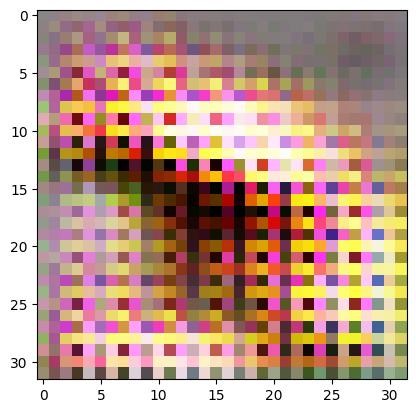

In [67]:
generator = keras.saving.load_model("training\\models\\generator_120_07-11-2023_20-17-19.keras")
discriminator = keras.saving.load_model("training\\models\\discriminator_120_07-11-2023_20-17-19.keras")
random_input = np.random.normal(0, 1, (1, GEN_INPUT_SIZE))
# print(random_input)
out = generator.predict(random_input)

print(np.max(out), np.min(out))
print(out.shape)
# print(out[0])
plt.imshow(out[0])
plt.show()

epoch 201
Generator avg loss:     0.6600708365440369
Discriminator avg loss: 0.7094335556030273
epoch 202
Generator avg loss:     0.6708482503890991
Discriminator avg loss: 0.7128368616104126
epoch 203
Generator avg loss:     0.708604633808136
Discriminator avg loss: 0.7121315598487854
epoch 204
Generator avg loss:     0.6550484895706177
Discriminator avg loss: 0.7106059193611145
epoch 205
Generator avg loss:     0.6663277745246887
Discriminator avg loss: 0.7123495936393738
epoch 206
Generator avg loss:     0.6952094435691833
Discriminator avg loss: 0.7107899785041809
epoch 207
Generator avg loss:     0.6731546521186829
Discriminator avg loss: 0.7107347846031189
epoch 208
Generator avg loss:     0.6702079772949219
Discriminator avg loss: 0.7105486989021301
epoch 209
Generator avg loss:     0.6965829730033875
Discriminator avg loss: 0.7090098261833191
epoch 210
Generator avg loss:     0.6904506087303162
Discriminator avg loss: 0.7096456289291382
epoch 211
Generator avg loss:     0.66878

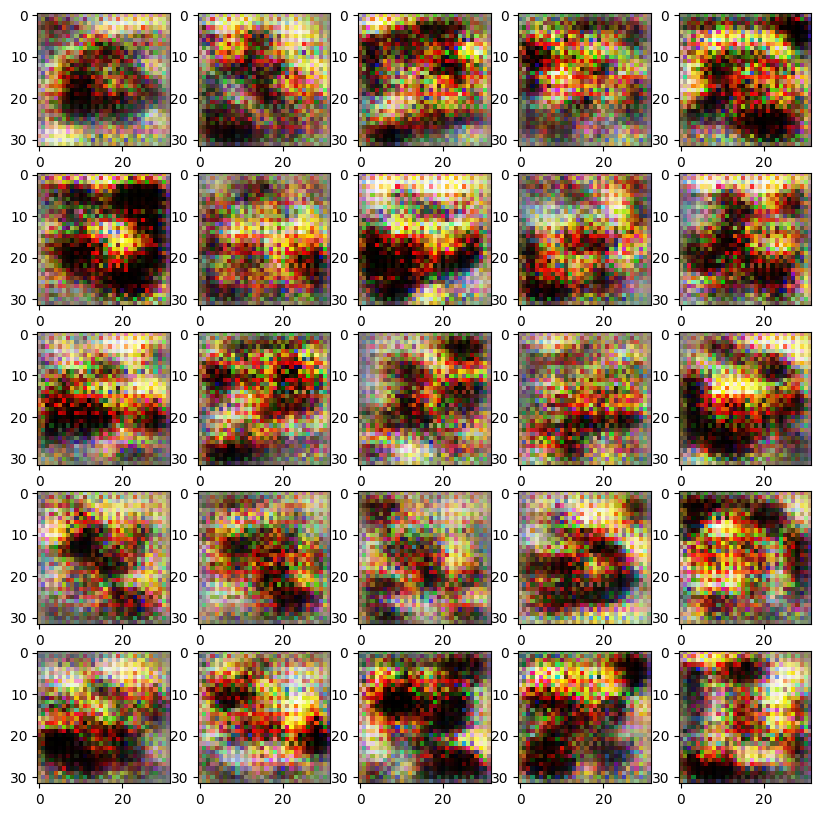

epoch 221
Generator avg loss:     0.6581578850746155
Discriminator avg loss: 0.703632116317749
epoch 222
Generator avg loss:     0.712778627872467
Discriminator avg loss: 0.7026509642601013
epoch 223
Generator avg loss:     0.6905154585838318
Discriminator avg loss: 0.704077422618866
epoch 224
Generator avg loss:     0.6526154279708862
Discriminator avg loss: 0.7056077718734741
epoch 225
Generator avg loss:     0.7240602374076843
Discriminator avg loss: 0.7032914757728577
epoch 226
Generator avg loss:     0.6551080942153931
Discriminator avg loss: 0.7025496363639832
epoch 227
Generator avg loss:     0.7368649244308472
Discriminator avg loss: 0.7012773752212524
epoch 228
Generator avg loss:     0.6852440237998962
Discriminator avg loss: 0.7029606699943542
epoch 229
Generator avg loss:     0.699015200138092
Discriminator avg loss: 0.7019842863082886
epoch 230
Generator avg loss:     0.7127506732940674
Discriminator avg loss: 0.7007309198379517
epoch 231
Generator avg loss:     0.66157293

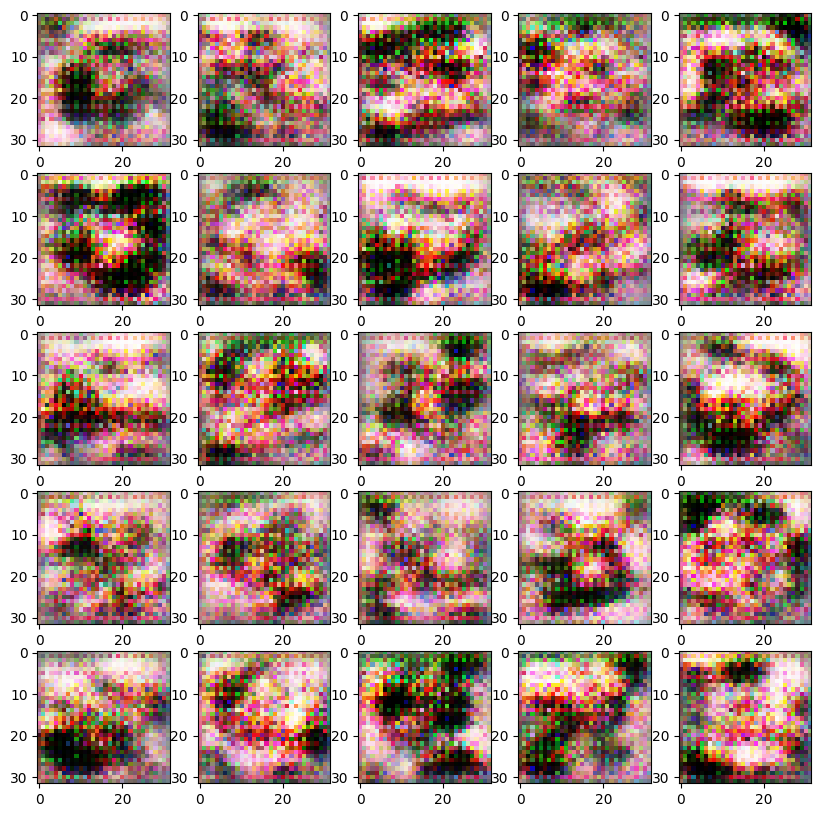

epoch 241
Generator avg loss:     0.6728692054748535
Discriminator avg loss: 0.7028935551643372
epoch 242
Generator avg loss:     0.7262132167816162
Discriminator avg loss: 0.7017272114753723
epoch 243
Generator avg loss:     0.669530987739563
Discriminator avg loss: 0.7002720832824707
epoch 244
Generator avg loss:     0.7229443788528442
Discriminator avg loss: 0.6995033621788025
epoch 245
Generator avg loss:     0.6913533806800842
Discriminator avg loss: 0.7017463445663452
epoch 246
Generator avg loss:     0.6927743554115295
Discriminator avg loss: 0.7011448740959167
epoch 247
Generator avg loss:     0.688622236251831
Discriminator avg loss: 0.7009407877922058
epoch 248
Generator avg loss:     0.6803617477416992
Discriminator avg loss: 0.7009478211402893
epoch 249
Generator avg loss:     0.6776604652404785
Discriminator avg loss: 0.7015739679336548
epoch 250
Generator avg loss:     0.6760372519493103
Discriminator avg loss: 0.7017983198165894
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


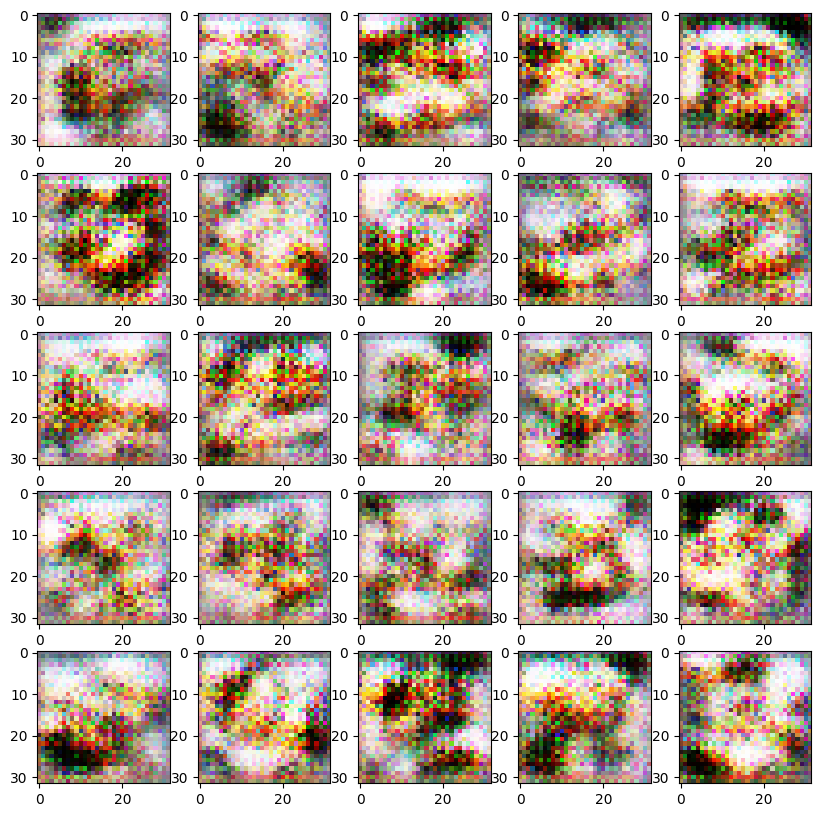

epoch 251
Generator avg loss:     0.6856480240821838
Discriminator avg loss: 0.701429545879364
epoch 252
Generator avg loss:     0.6909218430519104
Discriminator avg loss: 0.6994214653968811
epoch 253
Generator avg loss:     0.6951037645339966
Discriminator avg loss: 0.7003558874130249
epoch 254
Generator avg loss:     0.6823378801345825
Discriminator avg loss: 0.6982912421226501
epoch 255
Generator avg loss:     0.6579446792602539
Discriminator avg loss: 0.7034910321235657
epoch 256
Generator avg loss:     0.7357765436172485
Discriminator avg loss: 0.6958253979682922
epoch 257
Generator avg loss:     0.6629793643951416
Discriminator avg loss: 0.699727475643158
epoch 258
Generator avg loss:     0.7303328514099121
Discriminator avg loss: 0.6991713047027588
epoch 259
Generator avg loss:     0.6757006049156189
Discriminator avg loss: 0.6984151601791382
epoch 260
Generator avg loss:     0.6806731224060059
Discriminator avg loss: 0.7003147602081299
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


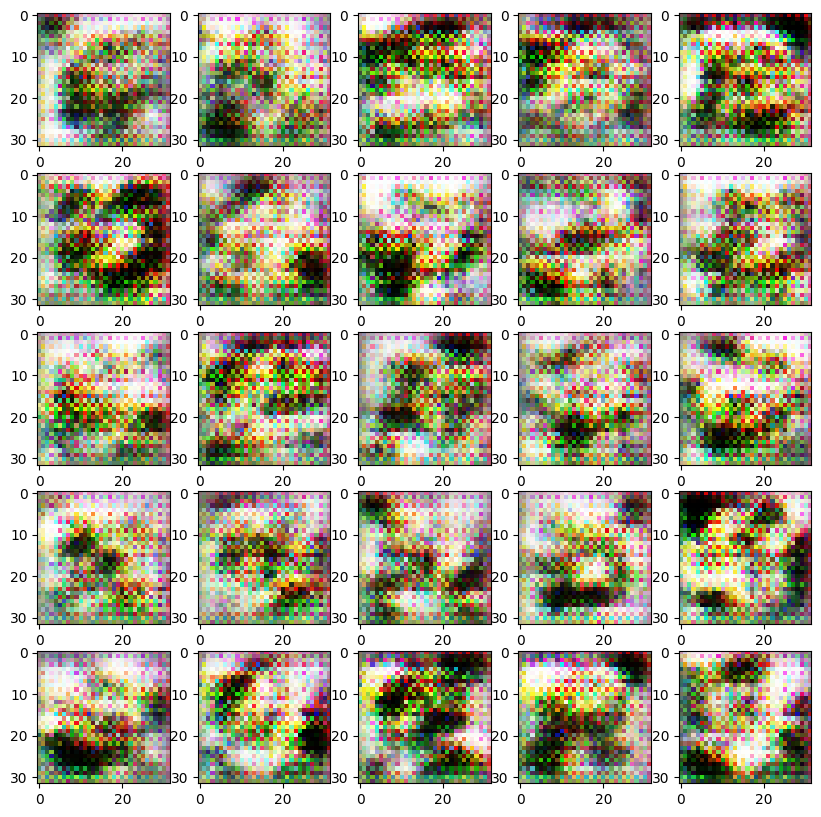

epoch 261
Generator avg loss:     0.6956217885017395
Discriminator avg loss: 0.7013375759124756
epoch 262
Generator avg loss:     0.678161084651947
Discriminator avg loss: 0.6991296410560608
epoch 263
Generator avg loss:     0.697005569934845
Discriminator avg loss: 0.7003541588783264
epoch 264
Generator avg loss:     0.6581400036811829
Discriminator avg loss: 0.7033027410507202
epoch 265
Generator avg loss:     0.7135395407676697
Discriminator avg loss: 0.6995285749435425
epoch 266
Generator avg loss:     0.6572791337966919
Discriminator avg loss: 0.6978455185890198
epoch 267
Generator avg loss:     0.7370637059211731
Discriminator avg loss: 0.7002538442611694
epoch 268
Generator avg loss:     0.6527707576751709
Discriminator avg loss: 0.7025311589241028
epoch 269
Generator avg loss:     0.7417713403701782
Discriminator avg loss: 0.6996881365776062
epoch 270
Generator avg loss:     0.6660516858100891
Discriminator avg loss: 0.6990819573402405
epoch 271
Generator avg loss:     0.739173

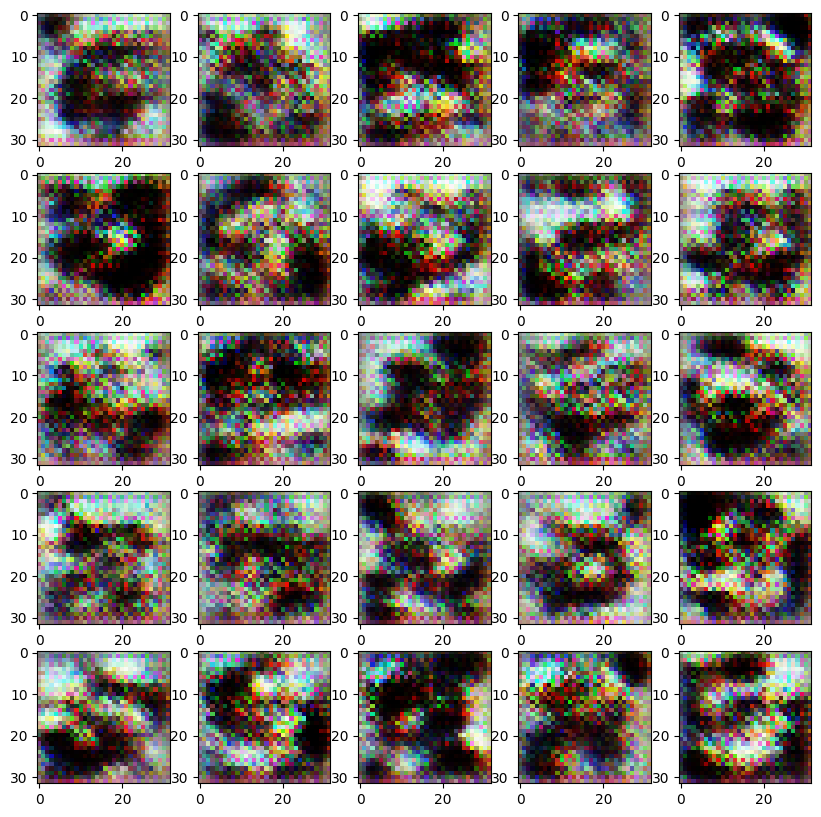

epoch 281
Generator avg loss:     0.6529378294944763
Discriminator avg loss: 0.7008216381072998
epoch 282
Generator avg loss:     0.7194876670837402
Discriminator avg loss: 0.7002884745597839
epoch 283
Generator avg loss:     0.6667458415031433
Discriminator avg loss: 0.6990060806274414
epoch 284
Generator avg loss:     0.7241465449333191
Discriminator avg loss: 0.6996521949768066
epoch 285
Generator avg loss:     0.676796019077301
Discriminator avg loss: 0.700110912322998
epoch 286
Generator avg loss:     0.7091510891914368
Discriminator avg loss: 0.6993488073348999
epoch 287
Generator avg loss:     0.6949574947357178
Discriminator avg loss: 0.6996004581451416
epoch 288
Generator avg loss:     0.680637538433075
Discriminator avg loss: 0.7005353569984436
epoch 289
Generator avg loss:     0.707729697227478
Discriminator avg loss: 0.7008724212646484
epoch 290
Generator avg loss:     0.667450487613678
Discriminator avg loss: 0.7005472183227539
epoch 291
Generator avg loss:     0.720532834

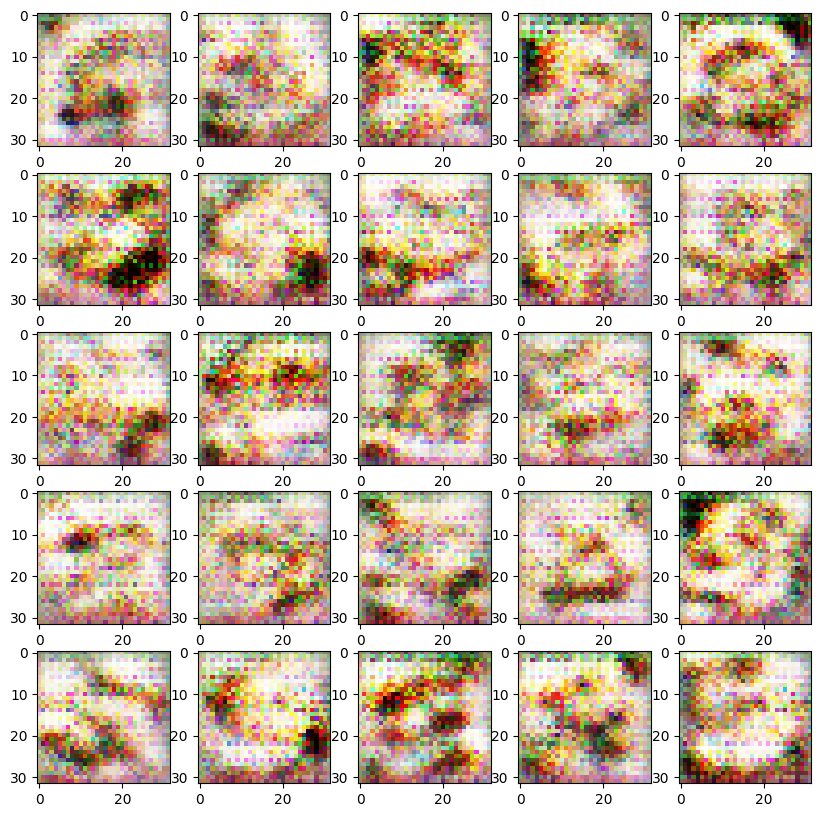

epoch 301
Generator avg loss:     0.7239837646484375
Discriminator avg loss: 0.6996195316314697
epoch 302
Generator avg loss:     0.6755627989768982
Discriminator avg loss: 0.6994133591651917
epoch 303
Generator avg loss:     0.7172927856445312
Discriminator avg loss: 0.6985700130462646
epoch 304
Generator avg loss:     0.68278968334198
Discriminator avg loss: 0.6993409991264343
epoch 305
Generator avg loss:     0.6991189122200012
Discriminator avg loss: 0.6993064284324646
epoch 306
Generator avg loss:     0.680144190788269
Discriminator avg loss: 0.699230432510376
epoch 307
Generator avg loss:     0.6793494820594788
Discriminator avg loss: 0.7005072236061096
epoch 308
Generator avg loss:     0.6845143437385559
Discriminator avg loss: 0.7003811597824097
epoch 309
Generator avg loss:     0.6711426377296448
Discriminator avg loss: 0.7000969648361206
epoch 310
Generator avg loss:     0.6930462121963501
Discriminator avg loss: 0.6993391513824463
epoch 311
Generator avg loss:     0.67738020

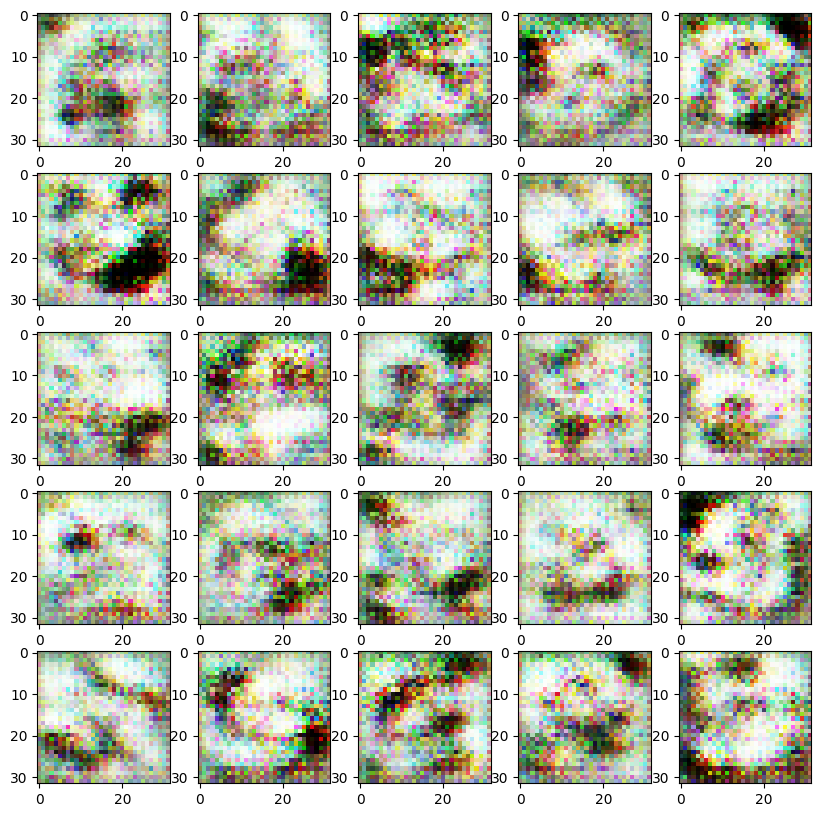

epoch 321
Generator avg loss:     0.7130210995674133
Discriminator avg loss: 0.6995571851730347
epoch 322
Generator avg loss:     0.6702100038528442
Discriminator avg loss: 0.6983639597892761
epoch 323
Generator avg loss:     0.7016536593437195
Discriminator avg loss: 0.6990991830825806
epoch 324
Generator avg loss:     0.7014306783676147
Discriminator avg loss: 0.6991134881973267
epoch 325
Generator avg loss:     0.6718099117279053
Discriminator avg loss: 0.7006285190582275
epoch 326
Generator avg loss:     0.7113000750541687
Discriminator avg loss: 0.7001299858093262
epoch 327
Generator avg loss:     0.6632761359214783
Discriminator avg loss: 0.7011805772781372
epoch 328
Generator avg loss:     0.7055080533027649
Discriminator avg loss: 0.6998244524002075
epoch 329
Generator avg loss:     0.668373703956604
Discriminator avg loss: 0.7000460624694824
epoch 330
Generator avg loss:     0.702488899230957
Discriminator avg loss: 0.6994114518165588
epoch 331
Generator avg loss:     0.668931

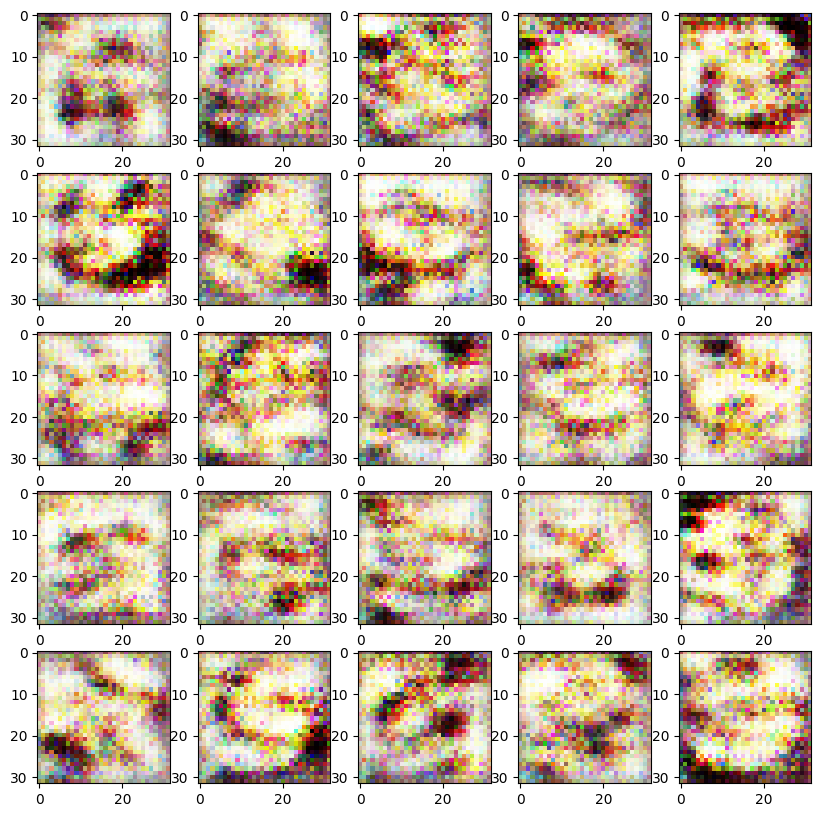

epoch 341
Generator avg loss:     0.7201648950576782
Discriminator avg loss: 0.7002071142196655
epoch 342
Generator avg loss:     0.6556926965713501
Discriminator avg loss: 0.7006546258926392
epoch 343
Generator avg loss:     0.7117252945899963
Discriminator avg loss: 0.7005419135093689
epoch 344
Generator avg loss:     0.6622456908226013
Discriminator avg loss: 0.7000547051429749
epoch 345
Generator avg loss:     0.7095362544059753
Discriminator avg loss: 0.6994404792785645
epoch 346
Generator avg loss:     0.6726366877555847
Discriminator avg loss: 0.6983492374420166
epoch 347
Generator avg loss:     0.7137702107429504
Discriminator avg loss: 0.6980418562889099
epoch 348
Generator avg loss:     0.6782082319259644
Discriminator avg loss: 0.6970812082290649
epoch 349
Generator avg loss:     0.7127319574356079
Discriminator avg loss: 0.6979329586029053
epoch 350
Generator avg loss:     0.6786295771598816
Discriminator avg loss: 0.6971993446350098
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


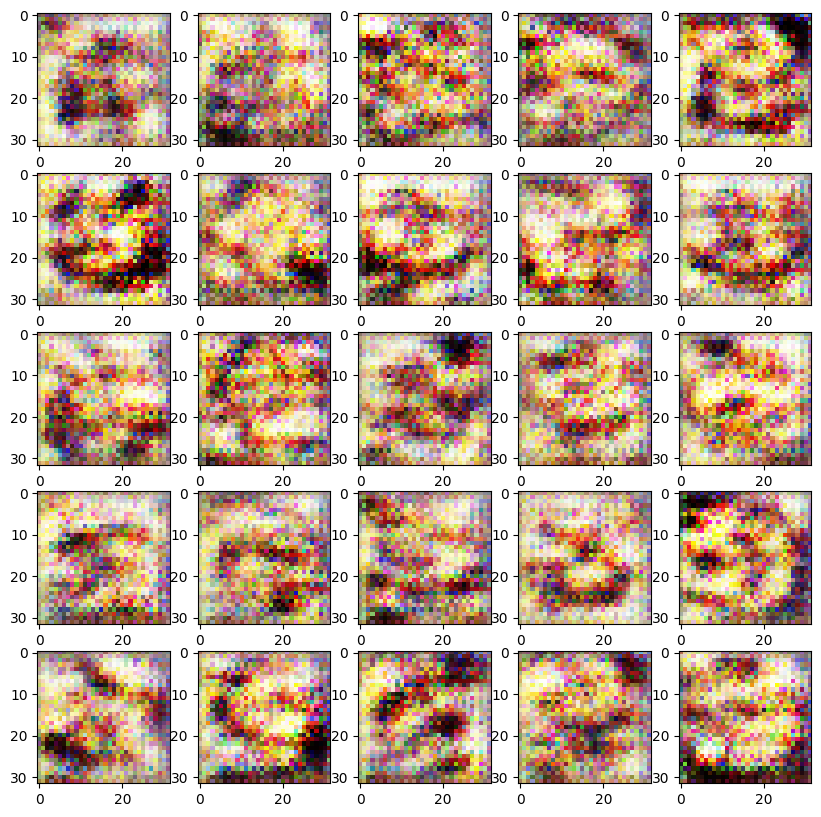

epoch 351
Generator avg loss:     0.7070209980010986
Discriminator avg loss: 0.6977645754814148
epoch 352
Generator avg loss:     0.6788650155067444
Discriminator avg loss: 0.6974208950996399
epoch 353
Generator avg loss:     0.7059590220451355
Discriminator avg loss: 0.6981611847877502
epoch 354
Generator avg loss:     0.6718124747276306
Discriminator avg loss: 0.6982602477073669
epoch 355
Generator avg loss:     0.7153581380844116
Discriminator avg loss: 0.6987739205360413
epoch 356
Generator avg loss:     0.660567045211792
Discriminator avg loss: 0.697886049747467
epoch 357
Generator avg loss:     0.7302109599113464
Discriminator avg loss: 0.6976727247238159
epoch 358
Generator avg loss:     0.6610426306724548
Discriminator avg loss: 0.6981985569000244
epoch 359
Generator avg loss:     0.7122470140457153
Discriminator avg loss: 0.6976305842399597
epoch 360
Generator avg loss:     0.677017331123352
Discriminator avg loss: 0.6982755064964294
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


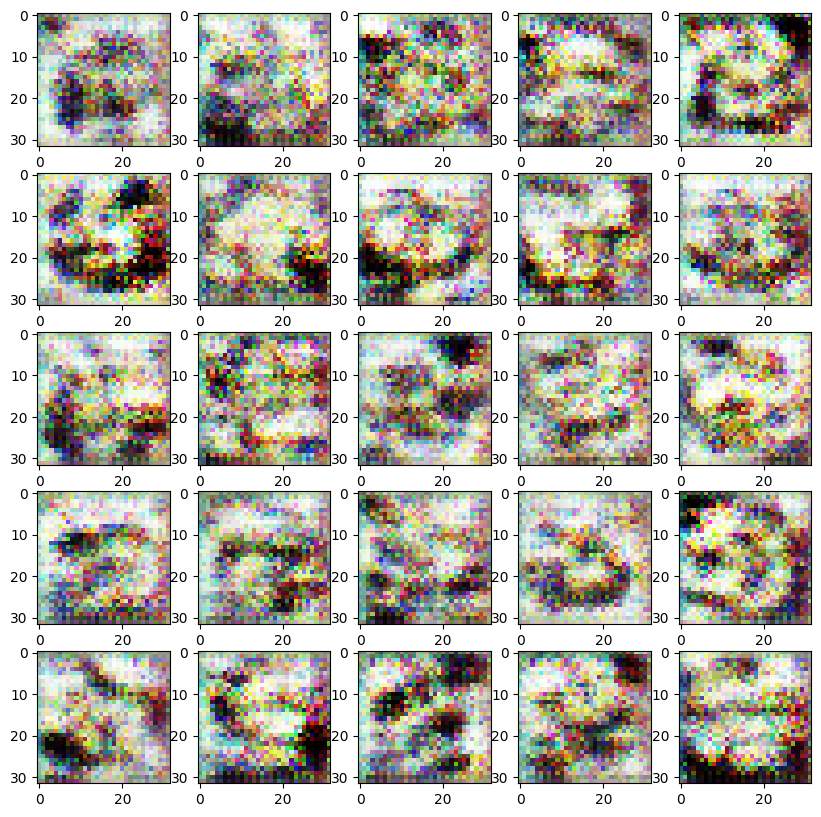

epoch 361
Generator avg loss:     0.7021946907043457
Discriminator avg loss: 0.697686493396759
epoch 362
Generator avg loss:     0.6795848608016968
Discriminator avg loss: 0.697482705116272
epoch 363
Generator avg loss:     0.6975823044776917
Discriminator avg loss: 0.6966748833656311
epoch 364
Generator avg loss:     0.6900205612182617
Discriminator avg loss: 0.697087824344635
epoch 365
Generator avg loss:     0.6780585050582886
Discriminator avg loss: 0.6971100568771362
epoch 366
Generator avg loss:     0.7078697681427002
Discriminator avg loss: 0.6982658505439758
epoch 367
Generator avg loss:     0.6626167893409729
Discriminator avg loss: 0.6982982158660889
epoch 368
Generator avg loss:     0.7147537469863892
Discriminator avg loss: 0.6981019973754883
epoch 369
Generator avg loss:     0.6634111404418945
Discriminator avg loss: 0.698045551776886
epoch 370
Generator avg loss:     0.7161336541175842
Discriminator avg loss: 0.6978623867034912
epoch 371
Generator avg loss:     0.66915899

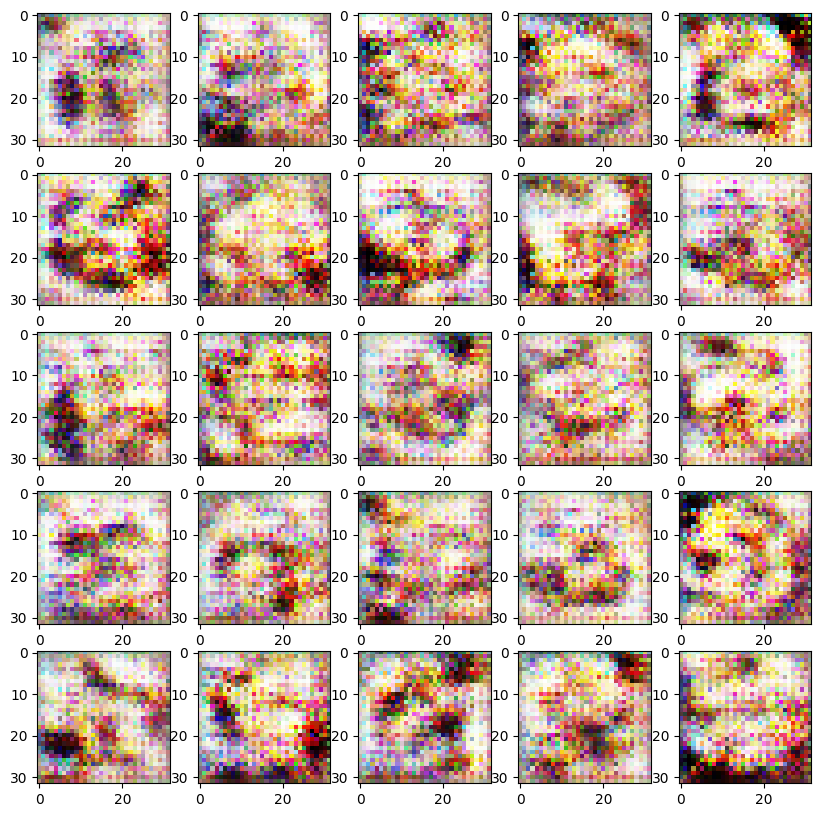

epoch 381
Generator avg loss:     0.7234638929367065
Discriminator avg loss: 0.6975547075271606
epoch 382
Generator avg loss:     0.6709887385368347
Discriminator avg loss: 0.698621928691864
epoch 383
Generator avg loss:     0.7108269333839417
Discriminator avg loss: 0.6988239884376526
epoch 384
Generator avg loss:     0.6760973930358887
Discriminator avg loss: 0.6991006135940552
epoch 385
Generator avg loss:     0.7067885398864746
Discriminator avg loss: 0.698540210723877
epoch 386
Generator avg loss:     0.6757646203041077
Discriminator avg loss: 0.6982192993164062
epoch 387
Generator avg loss:     0.7064610123634338
Discriminator avg loss: 0.6973628997802734
epoch 388
Generator avg loss:     0.6753945350646973
Discriminator avg loss: 0.697526752948761
epoch 389
Generator avg loss:     0.7069196701049805
Discriminator avg loss: 0.6973104476928711
epoch 390
Generator avg loss:     0.6772276759147644
Discriminator avg loss: 0.6972863674163818
epoch 391
Generator avg loss:     0.7088906

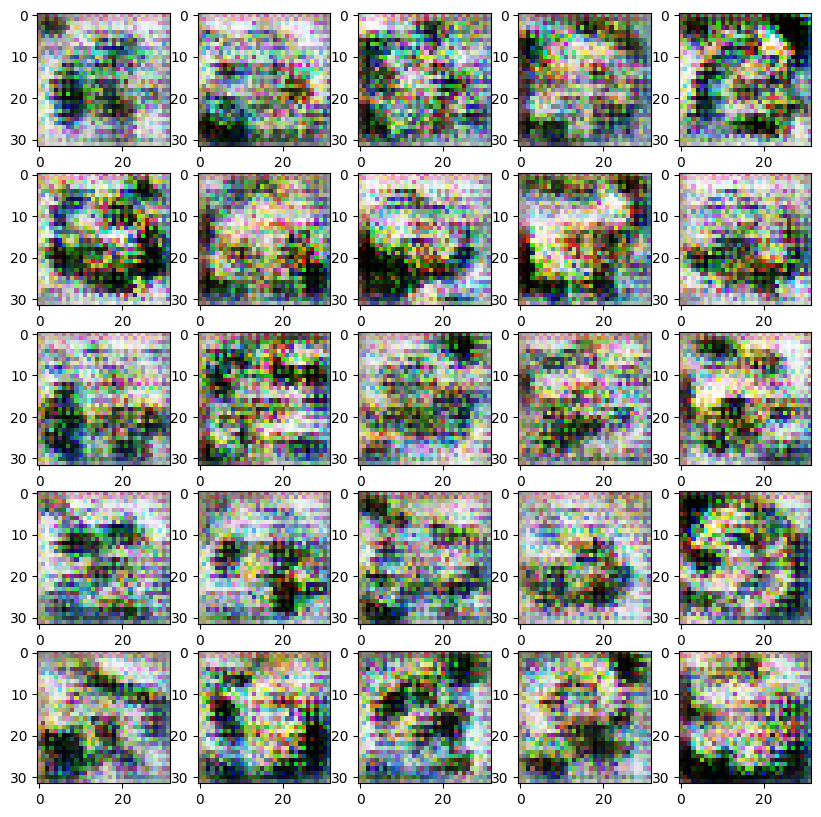

In [69]:

CHECK_WEIGHTS = False

for epoch in range(401, 551):
    print(f"epoch {epoch}")
    gen_losses = []
    discr_losses = []
    for step, (real_inputs, real_targets) in enumerate(real_dataloader):
        if CHECK_WEIGHTS and step < 2 and epoch == 1:
            print(step)
            org_dirscr_weights = discriminator.get_weights()
            org_gen_weights = generator.get_weights()

        discr_losses.append(train_disciminator(real_inputs, real_targets).detach().numpy())

        if CHECK_WEIGHTS and step < 2 and epoch == 1:
            check_weights_change(org_dirscr_weights, org_gen_weights, True)
            org_dirscr_weights = discriminator.get_weights()
            org_gen_weights = generator.get_weights()

        gen_losses.append(train_generator().detach().numpy())

        if CHECK_WEIGHTS and step < 2 and epoch == 1:
            check_weights_change(org_dirscr_weights, org_gen_weights, False)

    print(f"Generator avg loss:     {np.mean(gen_losses)}")
    print(f"Discriminator avg loss: {np.mean(discr_losses)}")

    now = datetime.now()
    time = now.strftime('%d-%m-%Y_%H-%M-%S')
    if epoch%50 == 0 or (epoch%20 == 0 and epoch <= 200):
        generator.save(f"training\\models\\generator_{epoch}_{time}.keras")
        discriminator.save(f"training\\models\\discriminator_{epoch}_{time}.keras")

    if epoch <= 20 or (epoch%20 == 0 and epoch <= 500) or epoch%50 == 0:
        imgs = generator.predict(validation_input)
        _, axs = plt.subplots(5, 5, figsize=(10, 10))
        axs = axs.flatten()
        for img, ax in zip(imgs, axs):
            ax.imshow(img)
        plt.savefig(f"training\\results\\imgs_{epoch}_{time}.png")
        plt.show()
